In [2]:
import numpy as np
import xarray
import pickle
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [3]:
filename_aro = "qrnn_gmi_nn_lpa_v0_jan.pickle"

with open(filename_aro, "rb") as f:   
    ay      = pickle.load(f)
    ay_pre  = pickle.load(f)
    ay_mean = pickle.load(f)
    pr      = pickle.load(f)
    ay_s    = pickle.load(f)    

In [4]:
filename_aro = "qrnn_gmi_nn_lpa_pr1_v0_jan.pickle"

with open(filename_aro, "rb") as f:   
    ty      = pickle.load(f)
    ty_pre  = pickle.load(f)
    ty_mean = pickle.load(f)
    pr      = pickle.load(f)
    ty_s    = pickle.load(f)    

In [5]:
filename_aro = "qrnn_gmi_nn_lpa_v0_jan_v.pickle"

with open(filename_aro, "rb") as f:   
    vay      = pickle.load(f)
    vay_pre  = pickle.load(f)
    vay_mean = pickle.load(f)
    pr      = pickle.load(f)
    vay_s    = pickle.load(f)    

In [6]:
filename_aro = "qrnn_gmi_nn_lpa_pr1_v0_jan_v.pickle"

with open(filename_aro, "rb") as f:   
    vty      = pickle.load(f)
    vty_pre  = pickle.load(f)
    vty_mean = pickle.load(f)
    pr      = pickle.load(f)
    vty_s    = pickle.load(f)    

In [7]:
Y = np.repeat(ay, 10, axis = 1)

In [8]:
ay_s[ay_s < 0] = 1e-6
ty_s[ty_s < 0] = 1e-6
vay_s[vay_s < 0] = 1e-6
vty_s[vty_s < 0] = 1e-6

In [9]:
def bias(y, y0):
    return np.mean(y-y0)

def mae(y, y0):
    return np.mean(np.abs(y-y0))

def rmsd(y, y0):
    return np.sqrt(np.mean((y-y0)**2))
    
def relative_bias(y, y0):
    
    return np.mean(100 * (y-y0)/y0)


In [10]:

mask2 = Y <= 0.1

In [11]:
iwpbins = np.array([0.1, 0.2, 0.3, 0.5, 0.75, 1,  1.5, 2.5, 3.5, 4.5, 6, 7.5, 10, 12.5, 15, 17.5, 20])

In [33]:
def calcu_bias(Y, ay_s):
    mask1 = Y > -1
    print (mask1.shape)
    iiwp = np.digitize(Y[mask1], iwpbins)
    RB = np.zeros([iwpbins.size - 1, 4])
    for i in range(iwpbins.size - 1):
        im = iiwp == i+1
        RB[i, 0] = bias(ay_s[mask1][im], Y[mask1][im])
        RB[i, 1] = mae(ay_s[mask1][im], Y[mask1][im])
        RB[i, 2] = mfe(ay_s[mask1][im], Y[mask1][im])
        RB[i, 3] = np.std(ay_s[mask1][im])
    
        
    return RB

def mfe( y0, y):
    return np.median(10**(np.abs(np.log10(y/y0))) - 1) * 100

def calculate_mfe(y0, y):
    nbins = 50
    logbins = np.log10(np.logspace(np.log10(1e-2), np.log10(13), nbins))
    ibins = np.digitize(np.log10(y0), logbins)
    err = []
    for ix in range(nbins):

        ix = np.where(ibins == ix)[0]

        err.append(mfe(y0[ix], y[ix]))
    return err, logbins

In [15]:
ay = ay.ravel()

In [18]:
err1 = ay_s.ravel() - Y
err2 = ay_mean.ravel()  - ay.ravel()
err3 = vty_mean.ravel() - ay.ravel()

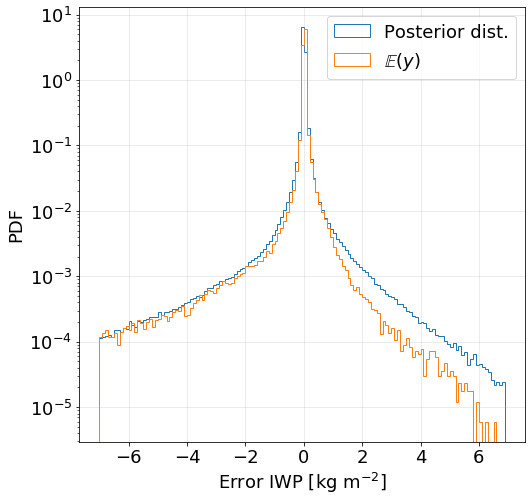

In [19]:
errbins = np.arange(-7, 7, 0.1)

fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.hist(err1, errbins, density = True, histtype = "step", label = "Posterior dist.")
ax.hist(err2, errbins, density = True, histtype = "step", label = r"$\mathbb{E}(y)$")
#ax.hist(err3, errbins, density = True, histtype = "step", label = "")
ax.set_yscale("log")
ax.grid("on", alpha = 0.3)
ax.set_xlabel(r"Error IWP [kg m$^{-2}$]")
ax.set_ylabel("PDF")
ax.legend()
fig.savefig("Error_distribution.pdf", bbox_inches = "tight")

In [20]:
RB

array([[-2.16638893e-02,  7.92047828e-02,  1.39517200e+02,
         1.12850986e-01],
       [-1.99543685e-02,  8.67040679e-02,  1.13196218e+02,
         1.28580332e-01],
       [-1.52174532e-02,  9.40181687e-02,  8.94295871e+01,
         1.40496865e-01],
       [-1.32238856e-02,  9.95570049e-02,  7.24460065e+01,
         1.50619864e-01],
       [-1.32440021e-02,  1.04215190e-01,  6.01570666e+01,
         1.55272707e-01],
       [-1.16075417e-02,  1.09635375e-01,  5.01472116e+01,
         1.63211286e-01],
       [-8.88868794e-03,  1.17609665e-01,  4.34900284e+01,
         1.76684484e-01],
       [-3.58717656e-03,  1.28285825e-01,  3.88693869e+01,
         2.01815307e-01],
       [-3.14227887e-03,  1.37359858e-01,  3.40524495e+01,
         2.18583182e-01],
       [ 5.86982071e-03,  1.48819491e-01,  3.05679321e+01,
         2.37972483e-01],
       [ 1.46698719e-02,  1.66092515e-01,  2.90954471e+01,
         2.73153454e-01],
       [ 1.62920505e-02,  1.83036417e-01,  2.74908900e+01,
      

(1681625,)

(1712100,)
(171210,)
(171210,)
(171210,)
(171210,)


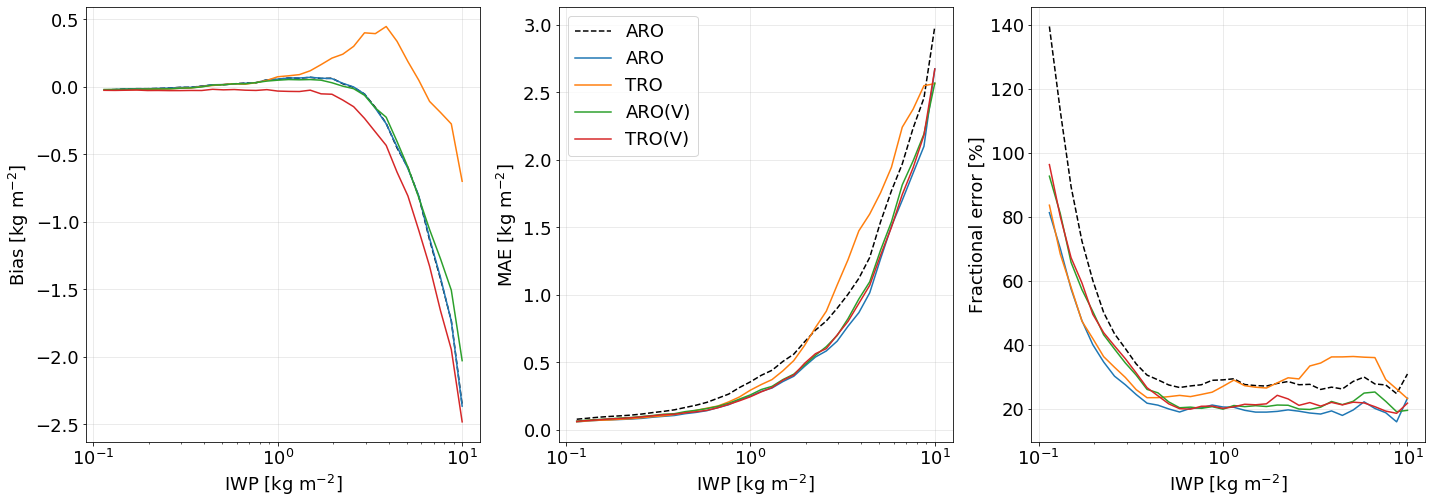

In [55]:
mask = Y > 0.1
mask1 = ay.ravel() > 0.1

iwpbins = np.logspace(np.log10(0.1), np.log10(10), 35)

fig, ax = plt.subplots(1, 3, figsize = [24, 8])
ax = ax.ravel()




RB = calcu_bias(Y[mask], ay_s.ravel()[mask])
ax[0].plot(iwpbins[1:],  RB[:, 0], 'k--', label = "ARO")
ax[1].plot(iwpbins[1:],  RB[:, 1], 'k--', label = "ARO")
ax[2].plot(iwpbins[1:],  RB[:, 2], 'k--', label = "ARO")

RB = calcu_bias(ay.ravel()[mask1], ay_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "ARO")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "ARO")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "ARO")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "ARO")

RB = calcu_bias(ty.ravel()[mask1], ty_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "TRO")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "TRO")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "TRO")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "TRO")

RB = calcu_bias(vay.ravel()[mask1], vay_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "ARO(V)")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "ARO(V)")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "ARO(V)")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "ARO(V)")

RB = calcu_bias(vty.ravel()[mask1], vty_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "TRO(V)")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "TRO(V)")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "TRO(V)")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "TRO(V)")
for i in range(3):
    ax[i].grid("on", alpha = 0.3)
    ax[i].set_xlabel("")

    ax[i].set_xscale("log")
    ax[1].legend()
    ax[i].set_xlabel(r"IWP [kg m$^{-2}$]")
#plt.yscale("log")
ax[0].set_ylabel(r"Bias [kg m$^{-2}$]")
ax[1].set_ylabel(r"MAE [kg m$^{-2}$]")
ax[2].set_ylabel(r"Fractional error [%]")

fig.savefig("IWP_statistics.pdf", bbox_inches = "tight")
#plt.plot(iwpbins, iwpbins)

(13037190,)
(1303719,)
(1303719,)
(1303719,)
(1303719,)


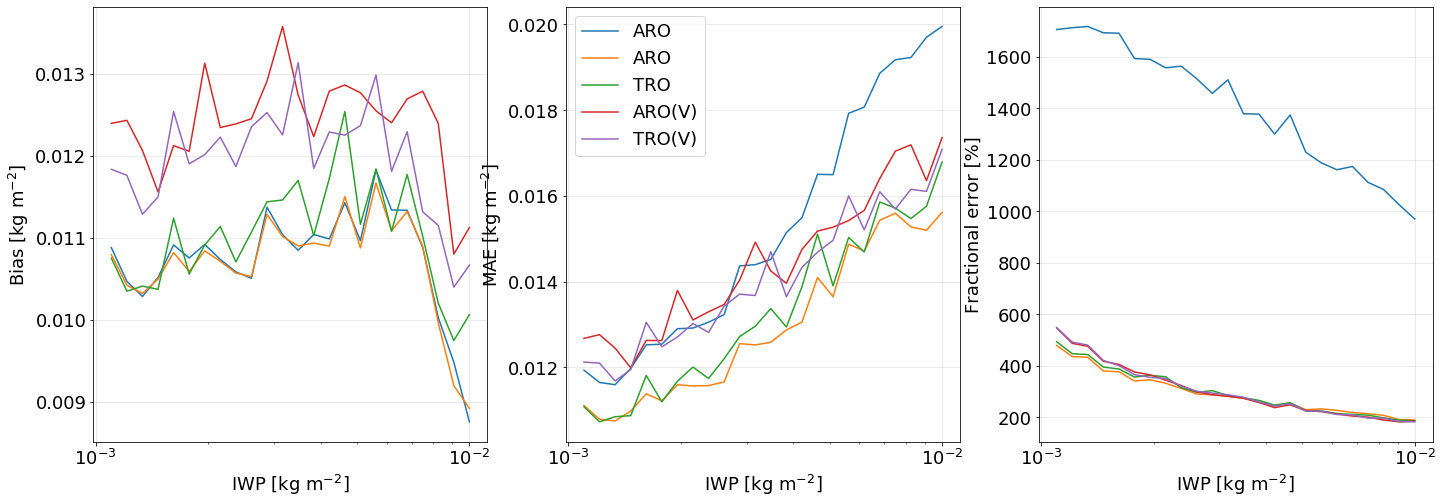

In [53]:
mask = Y < 0.01
mask1 = ay.ravel() < 0.01

fig, ax = plt.subplots(1, 3, figsize = [24, 8])
ax = ax.ravel()

iwpbins = np.logspace(np.log10(0.001), np.log10(0.01), 25)

RB = calcu_bias(Y[mask], ay_s.ravel()[mask])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "ARO")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "ARO")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "ARO")

RB = calcu_bias(ay.ravel()[mask1], ay_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "ARO")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "ARO")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "ARO")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "ARO")

RB = calcu_bias(ty.ravel()[mask1], ty_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "TRO")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "TRO")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "TRO")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "TRO")

RB = calcu_bias(vay.ravel()[mask1], vay_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "ARO(V)")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "ARO(V)")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "ARO(V)")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "ARO(V)")

RB = calcu_bias(vty.ravel()[mask1], vty_mean.ravel()[mask1])
ax[0].plot(iwpbins[1:],  RB[:, 0], label = "TRO(V)")
ax[1].plot(iwpbins[1:],  RB[:, 1], label = "TRO(V)")
ax[2].plot(iwpbins[1:],  RB[:, 2], label = "TRO(V)")
#ax[1].plot(iwpbins[1:],  RB[:, 3], 'x', label = "TRO(V)")
for i in range(3):
    ax[i].grid("on", alpha = 0.3)
    ax[i].set_xlabel("")

    ax[i].set_xscale("log")
    ax[1].legend()
    ax[i].set_xlabel(r"IWP [kg m$^{-2}$]")
#plt.yscale("log")
ax[0].set_ylabel(r"Bias [kg m$^{-2}$]")
ax[1].set_ylabel(r"MAE [kg m$^{-2}$]")
ax[2].set_ylabel(r"Fractional error [%]")

fig.savefig("IWP_statistics_low.pdf", bbox_inches = "tight")
#plt.plot(iwpbins, iwpbins)

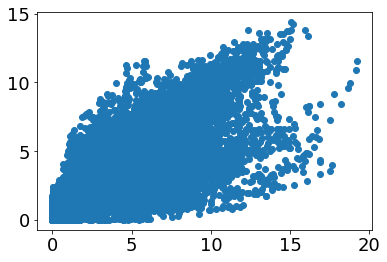

In [36]:
plt.scatter(ay, ay_mean)

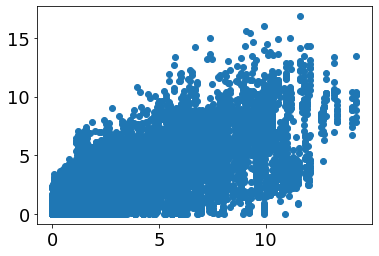

In [43]:
plt.scatter(Y[:1000000], ay_s.ravel()[:1000000])